### Análise de Polaridade
(comentários fb)

#### 1. <span style="color:#00b3b3">Instalação de pacotes</span>

In [4]:
if(!require('dplyr')) install.packages('dplyr')
if(!require('tidytext')) install.packages('tidytext')
if(!require('tidyverse')) install.packages('tidyverse')
if(!require('ggplot2')) install.packages('ggplot2')
if(!require('lexiconPT')) install.packages('lexiconPT')
if(!require('wordcloud')) install.packages('wordcloud')
if(!require('ggthemes')) install.packages('ggthemes')
if(!require('igraph')) install.packages('igraph')
if(!require('ggraph')) install.packages('ggraph')
source("http://bioconductor.org/biocLite.R")
biocLite("limma")

Loading required package: tidytext
Loading required package: lexiconPT
Loading required package: ggraph
Bioconductor version 3.7 (BiocInstaller 1.30.0), ?biocLite for help
A newer version of Bioconductor is available for this version of R,
  ?BiocUpgrade for help
BioC_mirror: https://bioconductor.org
Using Bioconductor 3.7 (BiocInstaller 1.30.0), R 3.5.3 (2019-03-11).
Installing package(s) ‘limma’
installation path not writeable, unable to update packages: boot, checkpoint,
  cluster, doParallel, foreign, iterators, jsonlite, MASS, Matrix, mgcv, nlme,
  R6, rpart, RUnit, survival, sys
Old packages: 'actuar', 'AER', 'aplpack', 'bayesm', 'blob', 'bnlearn', 'bold',
  'checkmate', 'classInt', 'coda', 'covr', 'coxme', 'crul', 'deldir',
  'deSolve', 'doSNOW', 'dplyr', 'DT', 'dtw', 'ellipsis', 'emmeans', 'fastICA',
  'fields', 'forecast', 'fpc', 'gam', 'ggmcmc', 'ggplot2', 'ggstance', 'haven',
  'hms', 'jomo', 'knitr', 'lava', 'lavaan', 'lpSolve', 'markdown', 'mclust',
  'mice', 'mlogit', 'mo

In [5]:
install.packages("tm", repos="http://R-Forge.R-project.org")

Installing package into ‘/home/nbuser/R’
(as ‘lib’ is unspecified)


#### 2. <span style="color:#00b3b3">Bibliotecas</span>

In [1]:
library(dplyr)
library(tidyverse)
library(tidytext)
library(ggplot2)
library(lexiconPT)

library(tm)
# library(tmap)

library(readr)
library(stringr)
# library(tidyr)
library(reshape2)
# library(syuzhet)
library(ggthemes)
library(wordcloud)
library(limma)
library(igraph)      # gerar grafo
library(ggraph)      # plotar grafo
library(lexiconPT)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.2.1     ✔ readr   1.3.1
✔ tibble  2.1.3     ✔ purrr   0.3.2
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ ggplot2 3.2.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required package: NLP

Attaching package: ‘NLP’

The following object is masked from ‘package:ggplot2’:

    annotate


Attaching package: ‘reshape2’

The following object is masked from ‘package:tidyr’:

    smiths

Loading required package: RColorBrewer

Attaching package: ‘igraph’

The following objects are masked from ‘package:purrr’:

    compose, simplify

The following object is masked from ‘package:t

#### 3. <span style="color:#00b3b3">Carrega Dados</span>

In [2]:
# comments <- read.csv(file="comentarios.csv", header=TRUE, sep=",")
data = read.columns("comentarios.csv", c("post_text","comment_message"), sep = ",")
# comments
colnames(data)
lapply(data, head)

[1] "post_text"       "comment_message"

$post_text
[1] "Mais uma vez  o Banrisul é o banco mais lembrado pelos gaúchos  de acordo com a pesquisa Top of Mind da Revista Amanhã. 👏👏👏  Permanecer na liderança é resultado da inovação constante e da dedicação ao buscar as melhores soluções em atendimento  produtos e serviços para quem mais importa: você  cliente. 😃  Grupo Amanhã #top19"
[2] "Mais uma vez  o Banrisul é o banco mais lembrado pelos gaúchos  de acordo com a pesquisa Top of Mind da Revista Amanhã. 👏👏👏  Permanecer na liderança é resultado da inovação constante e da dedicação ao buscar as melhores soluções em atendimento  produtos e serviços para quem mais importa: você  cliente. 😃  Grupo Amanhã #top19"
[3] "Mais uma vez  o Banrisul é o banco mais lembrado pelos gaúchos  de acordo com a pesquisa Top of Mind da Revista Amanhã. 👏👏👏  Permanecer na liderança é resultado da inovação constante e da dedicação ao buscar as melhores soluções em atendimento  produtos e serviços para quem mais importa: você  cliente. 😃  Grupo Amanhã #top19"
[4] "Mais uma vez  o Banrisul é o banco mais lembrado pelos gaúchos  de acordo com a pesquisa Top of Mind da Revista Amanhã. 👏👏👏  Permanecer na liderança é resultado da inovação constante e da dedicação ao buscar as melhores soluções em atendimento  produtos e serviços para quem mais importa: você  cliente. 😃  Grupo Amanhã #top19"
[5] "Mais uma vez  o Banrisul é o banco mais lembrado pelos gaúchos  de acordo com a pesquisa Top of Mind da Revista Amanhã. 👏👏👏  Permanecer na liderança é resultado da inovação constante e da dedicação ao buscar as melhores soluções em atendimento  produtos e serviços para quem mais importa: você  cliente. 😃  Grupo Amanhã #top19"
[6] "Mais uma vez  o Banrisul é o banco mais lembrado pelos gaúchos  de acordo com a pesquisa Top of Mind da Revista Amanhã. 👏👏👏  Permanecer na liderança é resultado da inovação constante e da dedicação ao buscar as melhores soluções em atendimento  produtos e serviços para quem mais importa: você  cliente. 😃  Grupo Amanhã #top19"
359 Levels:  ??????????? ... BanrisulPrev

$comment_message
[1] "Orgulho de fazer parte disso!!@ melhor banco!!!"    
[2] "Melhor Banco!!"                                     
[3] "#Mpaef #ENEF Me poupe #vemprompaef #MePoupe  Boraa!"
[4] "MELHOR BANCO!"                                      
[5] 👏👏👏                                                  
[6] #VEMPROMPAEF                                         
3916 Levels:  , ;) :) :D ?? ... \U0001f970

In [3]:
data

post_text,comment_message
<fct>,<fct>
"""Mais uma vez o Banrisul é o banco mais lembrado pelos gaúchos de acordo com a pesquisa Top of Mind da Revista Amanhã. 👏👏👏 Permanecer na liderança é resultado da inovação constante e da dedicação ao buscar as melhores soluções em atendimento produtos e serviços para quem mais importa: você cliente. 😃 Grupo Amanhã #top19""","""Orgulho de fazer parte disso!!@ melhor banco!!!"""
"""Mais uma vez o Banrisul é o banco mais lembrado pelos gaúchos de acordo com a pesquisa Top of Mind da Revista Amanhã. 👏👏👏 Permanecer na liderança é resultado da inovação constante e da dedicação ao buscar as melhores soluções em atendimento produtos e serviços para quem mais importa: você cliente. 😃 Grupo Amanhã #top19""","""Melhor Banco!!"""
"""Mais uma vez o Banrisul é o banco mais lembrado pelos gaúchos de acordo com a pesquisa Top of Mind da Revista Amanhã. 👏👏👏 Permanecer na liderança é resultado da inovação constante e da dedicação ao buscar as melhores soluções em atendimento produtos e serviços para quem mais importa: você cliente. 😃 Grupo Amanhã #top19""","""#Mpaef #ENEF Me poupe #vemprompaef #MePoupe Boraa!"""
"""Mais uma vez o Banrisul é o banco mais lembrado pelos gaúchos de acordo com a pesquisa Top of Mind da Revista Amanhã. 👏👏👏 Permanecer na liderança é resultado da inovação constante e da dedicação ao buscar as melhores soluções em atendimento produtos e serviços para quem mais importa: você cliente. 😃 Grupo Amanhã #top19""","""MELHOR BANCO!"""
"""Mais uma vez o Banrisul é o banco mais lembrado pelos gaúchos de acordo com a pesquisa Top of Mind da Revista Amanhã. 👏👏👏 Permanecer na liderança é resultado da inovação constante e da dedicação ao buscar as melhores soluções em atendimento produtos e serviços para quem mais importa: você cliente. 😃 Grupo Amanhã #top19""",👏👏👏
"""Mais uma vez o Banrisul é o banco mais lembrado pelos gaúchos de acordo com a pesquisa Top of Mind da Revista Amanhã. 👏👏👏 Permanecer na liderança é resultado da inovação constante e da dedicação ao buscar as melhores soluções em atendimento produtos e serviços para quem mais importa: você cliente. 😃 Grupo Amanhã #top19""",#VEMPROMPAEF
"""Mais uma vez o Banrisul é o banco mais lembrado pelos gaúchos de acordo com a pesquisa Top of Mind da Revista Amanhã. 👏👏👏 Permanecer na liderança é resultado da inovação constante e da dedicação ao buscar as melhores soluções em atendimento produtos e serviços para quem mais importa: você cliente. 😃 Grupo Amanhã #top19""",Amo
"""Nathaliaarcuri chama o Banrisul para o #vemprompaef""","""Nathalia Arcuri"""
"""Parabenizamos todos os gerentes Banrisul pelo empenho e dedicação. 👏👏👏Um dia tão especial quanto o atendimento prestado aos nossos clientes.""","""Parabéns Niressa Leite Dos Santos"""


#### 4. <span style="color:#00b3b3">Pré-processamento</span>

- Cria lista personalizada de *stopwords* em português

In [4]:
custom_stop_words <- bind_rows(stop_words,
                               tibble(word = tm::stopwords("portuguese"),
                                          lexicon = "custom"), tibble(word = "banrisul", lexicon = "personalized"),
                              tibble(word = "é", lexicon = "personalized"))
custom_stop_words

word,lexicon
<chr>,<chr>
a,SMART
a's,SMART
able,SMART
about,SMART
above,SMART
according,SMART
accordingly,SMART
across,SMART
actually,SMART


In [5]:
custom_stop_words %>% filter_at(vars('word'), any_vars(. %in% c('banrisul')))  

word,lexicon
<chr>,<chr>
banrisul,personalized


- Separa as sentenças em *tokens* e remove as *stopwords*

In [6]:
dfCorpus = Corpus(VectorSource(data$comment_message)) 

In [7]:
# inspect(dfCorpus)
myCorpus <- tm_map(dfCorpus, tolower)
# myCorpus <- tm_map(myCorpus, removeWords, custom_stop_words)
myCorpus <- tm_map(myCorpus, content_transformer(tolower))
myCorpus <- tm_map(myCorpus, removePunctuation)
myCorpus <- tm_map(myCorpus, removeWords, stopwords('pt'))
dictCorpus <- myCorpus
myCorpus <- tm_map(myCorpus, stemDocument)
# tokenize the corpus
myCorpusTokenized <- lapply(myCorpus, scan_tokenizer)
# stem complete each token vector
myTokensStemCompleted <- lapply(myCorpusTokenized, stemCompletion, dictCorpus)
# concatenate tokens by document, create data frame
comments <- data.frame(text = sapply(myTokensStemCompleted, paste, collapse = " "), stringsAsFactors = FALSE)
comments

Warning message in tm_map.SimpleCorpus(dfCorpus, tolower):
“transformation drops documents”Warning message in tm_map.SimpleCorpus(myCorpus, content_transformer(tolower)):
“transformation drops documents”Warning message in tm_map.SimpleCorpus(myCorpus, removePunctuation):
“transformation drops documents”Warning message in tm_map.SimpleCorpus(myCorpus, removeWords, stopwords("pt")):
“transformation drops documents”Warning message in tm_map.SimpleCorpus(myCorpus, stemDocument):
“transformation drops documents”

text
<chr>
orgulho fazer parte disso melhor banco
melhor banco
mpaef enef poupança vemprompaef mepoupe boraa
melhor banco
👏👏👏
vemprompaef
amo
nathalia arcuri
parabéns niressa leite santo


In [8]:
# names(comments)[names(comments) == "text"] <- "comment_message"
# names(comments)[names(comments) == "comment_message"] <- "text"
# comments

In [9]:
# define as_data_frame como sendo apenas da biblioteca dplyr
as_data_frame <- dplyr::as_data_frame

In [10]:
comments <- comments %>% map_if(is.factor, as.character) %>% as_data_frame 
tidy_comments <- comments %>%
  unnest_tokens(word, text) %>%
  anti_join(custom_stop_words)
# comments
# tidy_comments

Warning message:
“`as_data_frame()` is deprecated, use `as_tibble()` (but mind the new semantics).
This warning is displayed once per session.”Joining, by = "word"


In [11]:
# carregar datasets
data("oplexicon_v3.0")
data("sentiLex_lem_PT02")

op30 <- oplexicon_v3.0
sent <- sentiLex_lem_PT02

colnames(op30) <- c("word", "type", "sentiment", "polarity_revision")

op30 <- data.frame(lapply(op30, function(x) {
                  gsub("-1", "negativo", x)
              }))

op30 <- data.frame(lapply(op30, function(x) {
                  gsub("1", "positivo", x)
              }))

op30 <- data.frame(lapply(op30, function(x) {
                  gsub("0", "neutro", x)
              }))

op30 %>% select(word, sentiment)

# as_tibble(op30)
op30
tibbleop30 <- as_tibble(op30)

word,sentiment
<fct>,<fct>
=[,negativo
=@,negativo
=p,negativo
=P,negativo
=x,negativo
=d,positivo
=D,positivo
;),positivo
;),positivo


word,type,sentiment,polarity_revision
<fct>,<fct>,<fct>,<fct>
=[,emot,negativo,A
=@,emot,negativo,A
=p,emot,negativo,A
=P,emot,negativo,A
=x,emot,negativo,A
=d,emot,positivo,A
=D,emot,positivo,A
;),emot,positivo,A
;),emot,positivo,A


In [12]:
word_counts <- tidy_comments %>%
  inner_join(op30) %>%
  count(word, sentiment, sort = TRUE) %>%
  ungroup()
# word_counts

Joining, by = "word"
Warning message:
“Column `word` joining character vector and factor, coercing into character vector”

In [13]:
tidy_comments %>%
  count(word, sort = TRUE)

word,n
<chr>,<int>
dia,494
parabéns,426
bom,383
inbox,352
banco,328
agência,268
olá,238
boa,207
obrigado,200


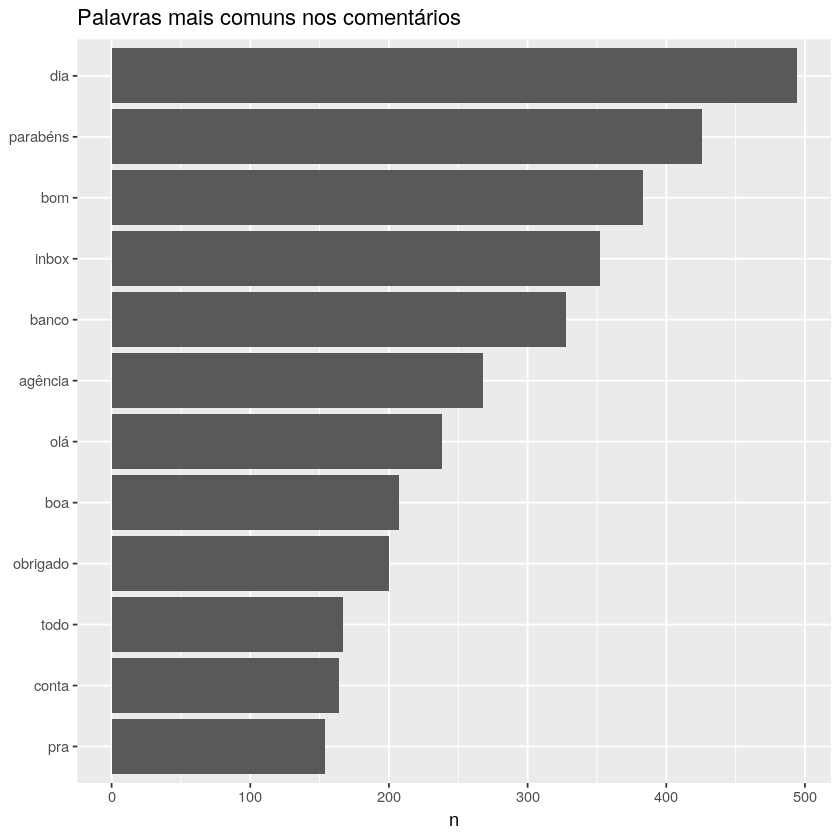

In [14]:
tidy_comments %>%
  count(word, sort = TRUE) %>%
  filter(n > 150) %>%
  mutate(word = reorder(word, n)) %>%
  ggplot(aes(word, n)) +
  geom_col() +
  xlab(NULL) +
  coord_flip() + ggtitle("Palavras mais comuns nos comentários")

## **4.** Polaridade Geral

In [15]:
# as_tibble(op30)

word_counts <- tidy_comments %>%
  inner_join(tibbleop30) %>%
  count(word, sentiment, sort = TRUE) %>%
  ungroup()
word_counts

Joining, by = "word"
Warning message:
“Column `word` joining character vector and factor, coercing into character vector”

word,sentiment,n
<chr>,<fct>,<int>
bom,positivo,383
boa,positivo,207
obrigado,negativo,200
obrigada,negativo,138
fazer,neutro,135
ser,positivo,129
grande,neutro,89
chamar,positivo,86
ter,neutro,83


In [16]:
# usar funçao do tidytext para criar uma linha para cada palavra de um comentario
df_comments_unnested <- comments %>% unnest_tokens(word, text)
df_comments_unnested

word
<chr>
orgulho
fazer
parte
disso
melhor
banco
melhor
banco
mpaef


In [17]:
df_comments_unnested %>% 
  left_join(op30) %>% 
  select(word, sentiment) #%>% 
#   head(10)

Joining, by = "word"
Warning message:
“Column `word` joining character vector and factor, coercing into character vector”

word,sentiment
<chr>,<fct>
orgulho,NA
fazer,neutro
parte,NA
disso,NA
melhor,positivo
banco,NA
melhor,positivo
banco,NA
mpaef,NA


Selecting by n


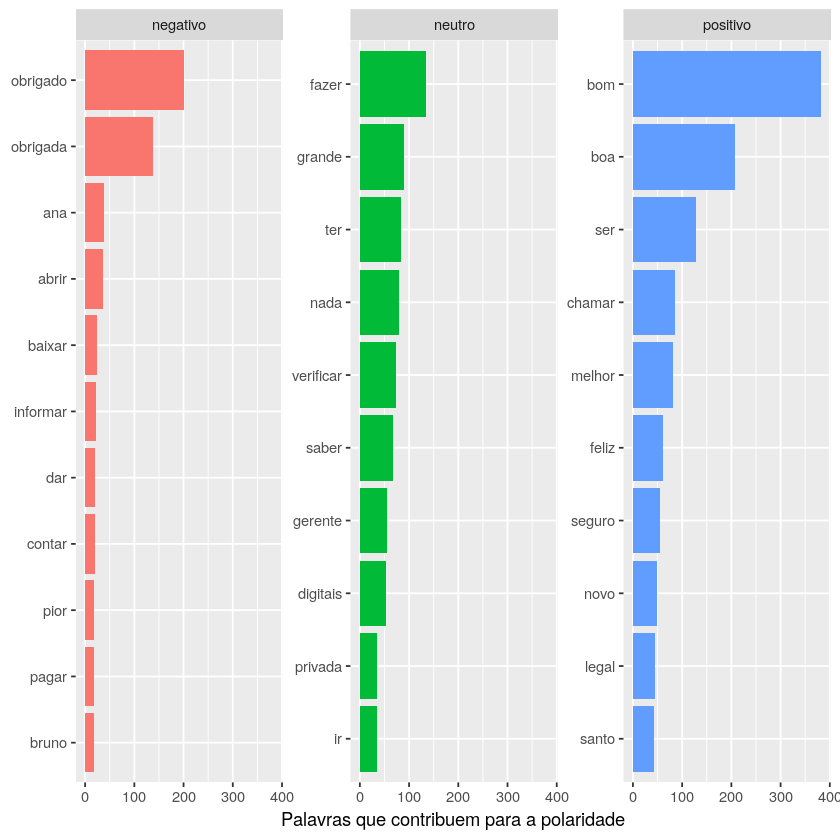

In [18]:
idk <- word_counts %>%
  group_by(sentiment) %>%
  top_n(10) %>%
  ungroup() %>%
  mutate(word = reorder(word, n)) %>%
  ggplot(aes(word, n, fill = sentiment)) +
  geom_col(show.legend = FALSE) +
  facet_wrap(~sentiment, scales = "free_y") +
  labs(y = "Palavras que contribuem para a polaridade",
       x = NULL) +
  coord_flip()

plot(idk)

Joining, by = "word"


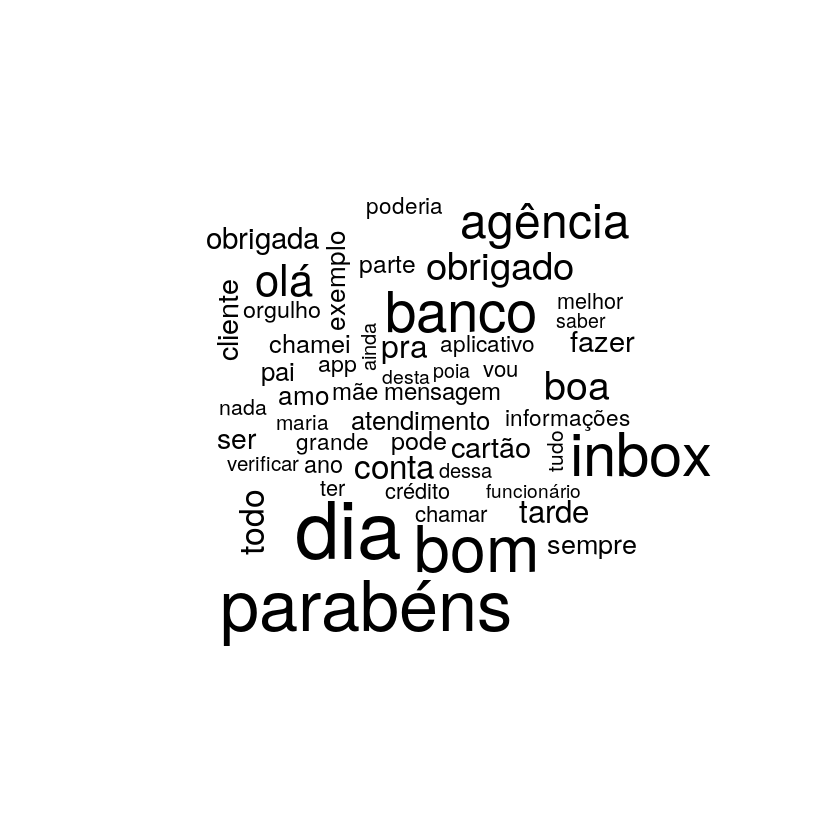

In [19]:
tidy_comments%>%
  anti_join(stop_words) %>%
  count(word) %>%
  with(wordcloud(word, n, max.words = 50))

Joining, by = "word"
Warning message:
“Column `word` joining character vector and factor, coercing into character vector”

[1] "NULL"

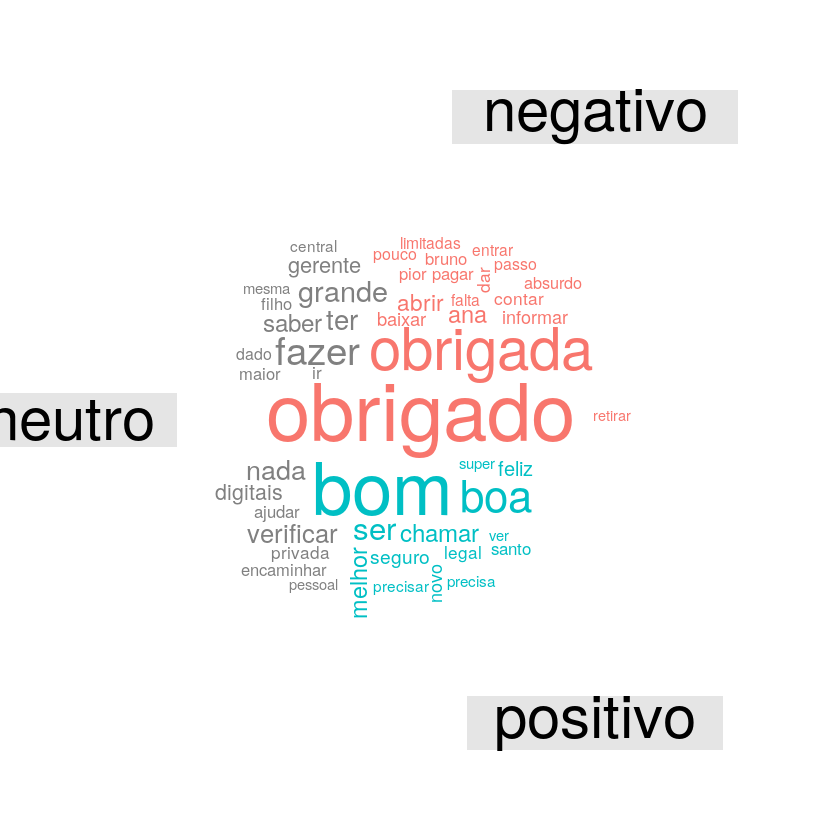

In [20]:
# cria uma wordcloud de palavras positivas (azul) vs negativas (vermelhas) vs neutras (cinza)


idk <- tidy_comments %>%
  inner_join(op30) %>%
  count(word, sentiment, sort = TRUE) %>%
  acast(word ~ sentiment, value.var = "n", fill = 0) %>%
  comparison.cloud(colors = c("#F8766D", "#808080","#00BFC4"),
                   max.words = 50)

typeof(idk)
# png(filename="faithful.png")
# plot(idk)
# dev.off()

Joining, by = "word"
Warning message:
“Column `word` joining character vector and factor, coercing into character vector”

ERROR: Error: Unknown graphics device ''


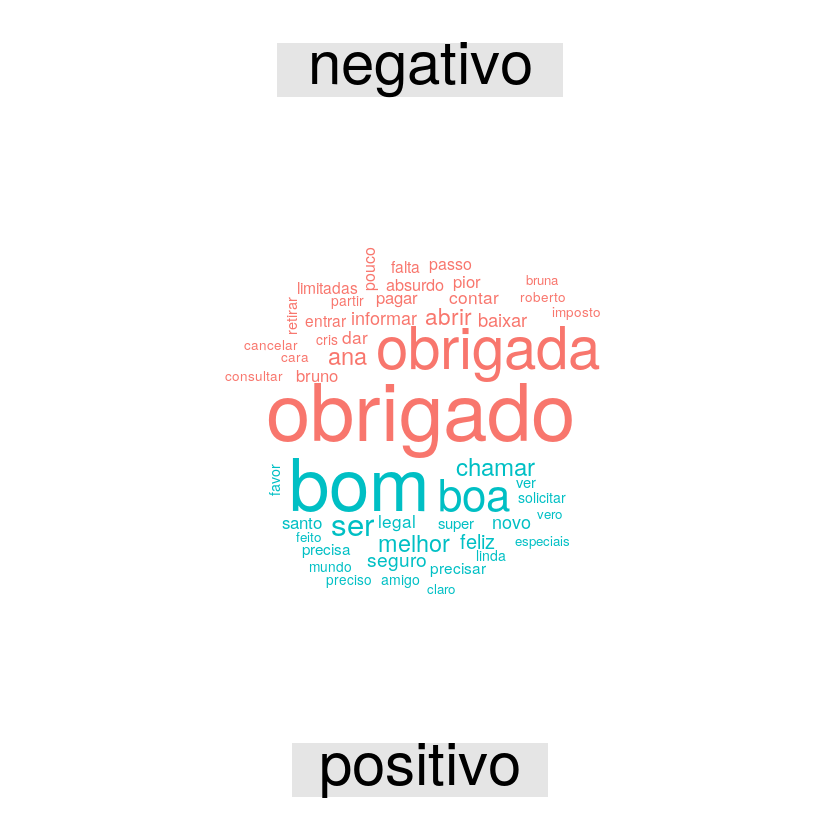

In [21]:
# mesma coisa que a célula anterior porém desconsiderando a categoria "neutro
# cria uma wordcloud de palavras positivas (azul) vs negativas (vermelhas)
idk <- tidy_comments %>%
  inner_join(op30 %>% filter(sentiment!="neutro")) %>%
  count(word, sentiment, sort = TRUE) %>%
  acast(word ~ sentiment, value.var = "n", fill = 0) %>%
  comparison.cloud(colors = c("#F8766D", "#00BFC4"),
                   max.words = 50)

ggsave(filename = 'Filename', idk, width=4, height=4)


### Relações entre palavras (Geral)

In [ ]:
comments_bigrams <- comments %>%
  unnest_tokens(bigram, text, token = "ngrams", n = 2)
# comments_bigrams

In [ ]:
bigrams_separated <- comments_bigrams %>%
  separate(bigram, c("word1", "word2"), sep = " ")
bigrams_filtered <- bigrams_separated %>%
  filter(!word1 %in% stop_words$word) %>%
  filter(!word2 %in% stop_words$word)
bigram_counts <- bigrams_filtered %>% 
  count(word1, word2, sort = TRUE)
# bigram_counts

In [ ]:
bigrams_united <- bigrams_filtered %>%
  unite(bigram, word1, word2, sep = " ")
# bigrams_united

In [ ]:
bigram_tf_idf <- bigrams_united %>%
  count(bigram)
bigram_tf_idf <- bigram_tf_idf %>% filter(n>30)
ggplot(aes(x = reorder(bigram, n), y=n), data=bigram_tf_idf) + geom_bar(stat = 'identity') + ggtitle("Bigramas mais comuns nos comentários") + coord_flip()

In [ ]:
bigram_graph <- bigram_counts %>%
  filter(n > 20) %>%
  graph_from_data_frame()
# bigram_graph

In [ ]:
set.seed(2019)
ggraph(bigram_graph, layout = "fr") +
  geom_edge_link() +
  geom_node_point(color = "darkslategray4", size = 3) +
  geom_node_text(aes(label = name), vjust = 1.8) + ggtitle("Bigramas mais comuns")

In [ ]:
tale <- character()
tale

In [ ]:
df <- cbind(data,comments)
df

## Polaridade por Postagem

In [ ]:
# group_by(df, by="post_text")
# df$group_id <- df %>% group_indices(post_text) 
df %>% 
    mutate(group_id = group_indices(., post_text))

In [ ]:
# iterate over group
for(i in unique(df$group_id)){
    #new_df <- df[df$group_id == i]
    comments <- subset.data.frame(df, group_id== i)
    comments <- data.frame(comments$text)
    comments <- comments %>% map_if(is.factor, as.character) %>% as_data_frame 

    tidy_df <- comments %>%
    unnest_tokens(word, comments.text) %>%
    anti_join(custom_stop_words)
    #     tidy_df <- subset.data.frame(df, group_id== i)
    
    #     if(any(df$group_id == i)){
    word_counts <- tidy_df %>%
    inner_join(tibbleop30) %>%
    count(word, sentiment, sort = TRUE) %>%
    ungroup()

    df_comments_unnested <- comments %>% unnest_tokens(word, text)

    df_comments_unnested %>%  left_join(op30) %>% select(word, sentiment)

    idk <- word_counts %>%
    group_by(sentiment) %>%
    top_n(10) %>%
    ungroup() %>%
    mutate(word = reorder(word, n)) %>%
    ggplot(aes(word, n, fill = sentiment)) +
    geom_col(show.legend = FALSE) +
    facet_wrap(~sentiment, scales = "free_y") +
    labs(y = "Palavras que contribuem para a polaridade",
       x = NULL) +
    coord_flip()
    
    filename <- paste(toString(i), "plot.pdf", sep="_")
    plot(idk)
    dev.print(png, filename)
    dev.off()

#     tidy_df%>%
#     anti_join(stop_words) %>%
#     count(word) %>%
#     with(wordcloud(word, n, max.words = 90))

#     cria uma wordcloud de palavras positivas (azul) vs negativas (vermelhas)
#     tidy_comments %>%
#     inner_join(op30 %>% filter(sentiment!="neutro")) %>%
#     count(word, sentiment, sort = TRUE) %>%
#     acast(word ~ sentiment, value.var = "n", fill = 0) %>%
#     comparison.cloud(colors = c("#F8766D", "#00BFC4"),
#                    max.words = 100)
#     }
#      print(new_df)

#     break
}